<a href="https://colab.research.google.com/github/PIYUSHSHARMA2001/Machine_Learning_Projects/blob/main/Big_Mart_Sale_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

Data Collection and Analysis

In [2]:
sale_data = pd.read_csv('https://raw.githubusercontent.com/PIYUSHSHARMA2001/Machine_Learning_Projects/main/Big_Mart_Sale_Prediction_Train.csv')

In [3]:
# printing first five rows of dataset
sale_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# printing Last five rows of dataset
sale_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# number of data points and number of features
sale_data.shape

(8523, 12)

Categorical Features

-->Item_Identifier

-->Item_Fat_Content

-->Item_Type

-->Outlet_Identifier

-->Outlet_Size

-->Outlet_Location_Type

-->Outlet_Type

In [6]:
# some information about the data
sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# checking for missing data into the dataframe
sale_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average value

Mode--> Most Repeated Value


Imputation is the replacing of missing value with the mean value



Item_weight(numerical Feature) --> mean(Item_Weight)

Outlet_size(categorical Feature) --> mode(Outlet_size)


In [8]:
#mean value of Item_Weight Column
sale_data['Item_Weight'].mean()

12.857645184135976

In [9]:
# filling the missing values in item weight columns with its mean value
sale_data['Item_Weight'].fillna(sale_data['Item_Weight'].mean(),inplace = True)

Replacing The missing Values of Outlet_Size with mode

In [10]:
sale_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [11]:
mode_of_outlet_size = sale_data.pivot_table(values='Outlet_Size',columns = 'Outlet_Type',aggfunc=(lambda x: x.mode()[0]))

In [12]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [13]:
missing_values = sale_data['Outlet_Size'].isnull()

In [14]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [16]:
sale_data.loc[missing_values, 'Outlet_Size'] = (sale_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x]))

In [17]:
# checking for missing data into the dataframe
sale_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [18]:
# statistical measures about the data
sale_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
sale_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Numerical Features

In [20]:
sns.set()


<Figure size 720x720 with 0 Axes>

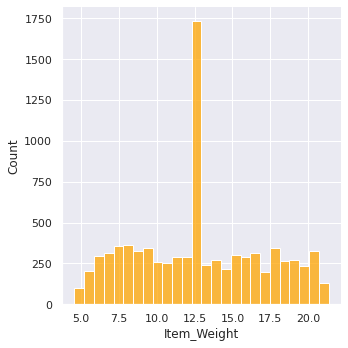

In [21]:
#item Weight distribution
plt.figure(figsize=(10,10))
sns.displot(sale_data['Item_Weight'],color='orange')
plt.show()

<Figure size 720x720 with 0 Axes>

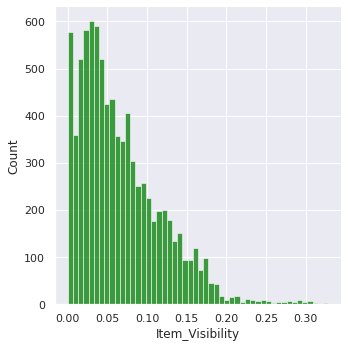

In [22]:
#item Visibility distribution
plt.figure(figsize=(10,10))
sns.displot(sale_data['Item_Visibility'],color='green')
plt.show()

<Figure size 720x720 with 0 Axes>

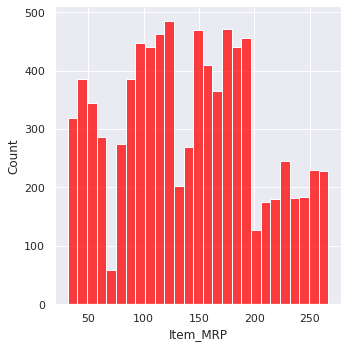

In [23]:
#item MRP distribution
plt.figure(figsize=(10,10))
sns.displot(sale_data['Item_MRP'],color='red')
plt.show()

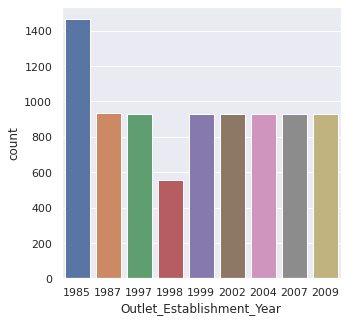

In [24]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(5,5))
sns.countplot(x = 'Outlet_Establishment_Year', data = sale_data)
plt.show()

<Figure size 720x720 with 0 Axes>

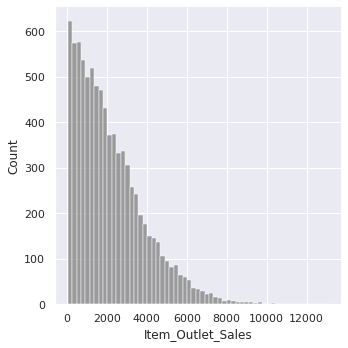

In [25]:
#Outlet_Establishment_Year distribution
plt.figure(figsize=(10,10))
sns.displot(sale_data['Item_Outlet_Sales'],color='grey')
plt.show()

Categorical Features

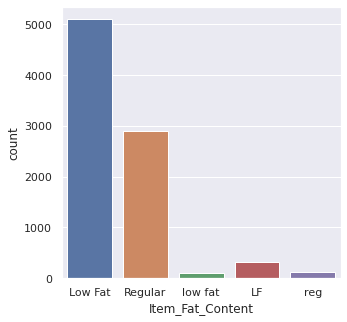

In [26]:
#Item_Fat_Content distribution
plt.figure(figsize=(5,5))
sns.countplot(x='Item_Fat_Content',data = sale_data)
plt.show()

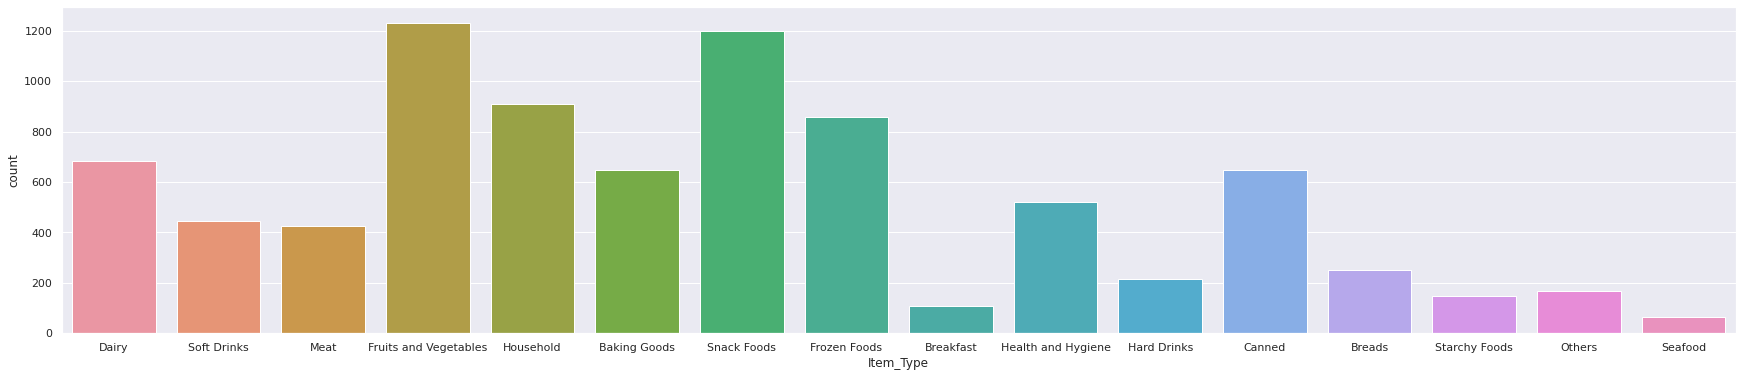

In [27]:
#Item_Type distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type',data = sale_data)
plt.show()

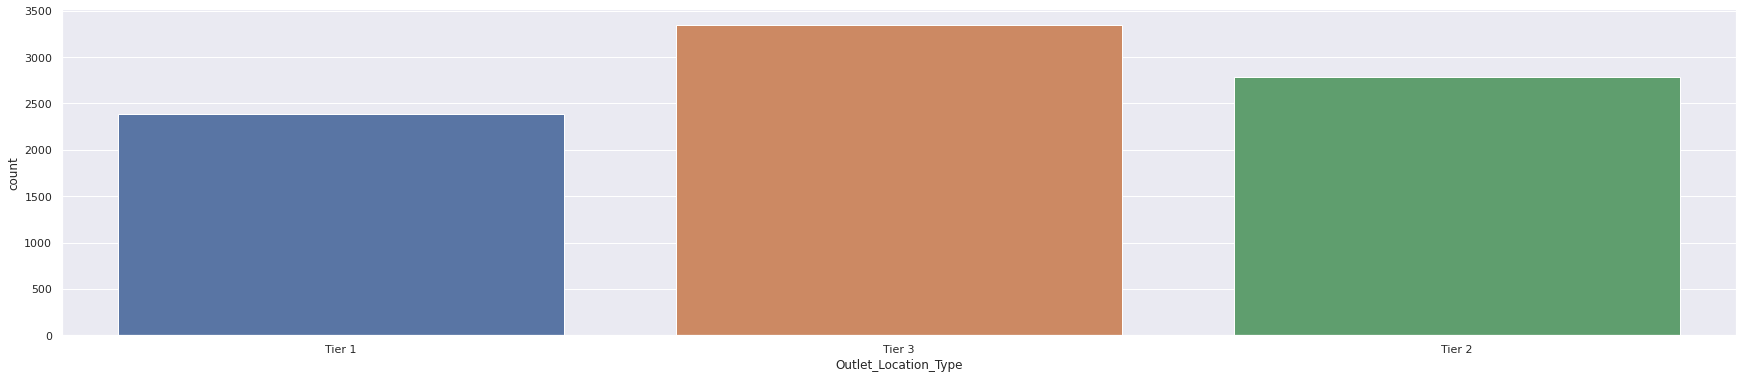

In [28]:
# Outlet_Location_Type distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Outlet_Location_Type',data = sale_data)
plt.show()

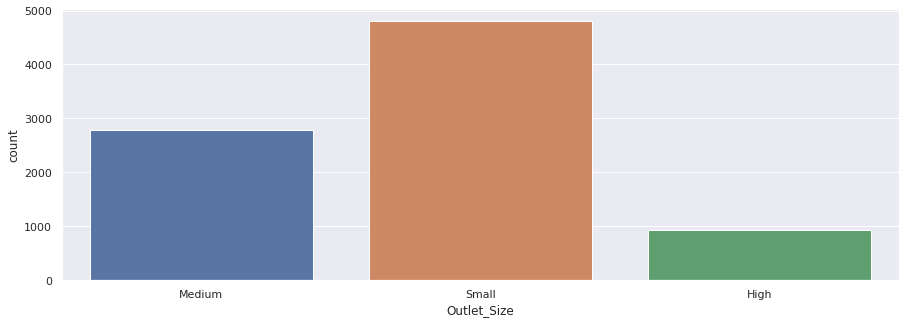

In [30]:
#Outlet_Size distribution
plt.figure(figsize=(15,5))
sns.countplot(x='Outlet_Size',data = sale_data)
plt.show()

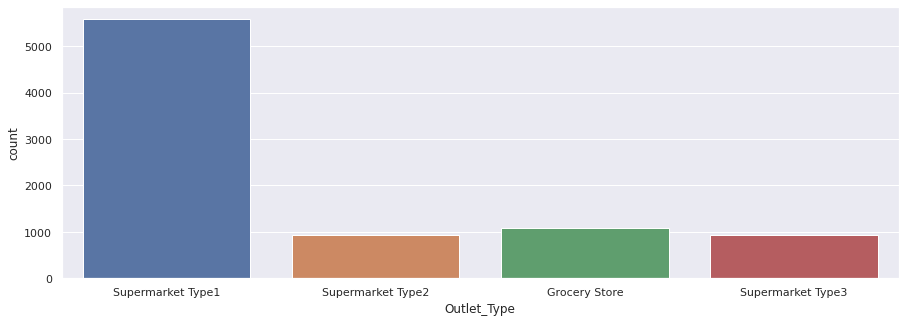

In [31]:
#Outlet_Type distribution
plt.figure(figsize=(15,5))
sns.countplot(x='Outlet_Type',data = sale_data)
plt.show()

Data Pre-Processing

In [32]:
sale_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
sale_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [34]:
sale_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)

In [35]:
sale_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [36]:
encoder = LabelEncoder()


In [37]:
sale_data['Item_Identifier']= encoder.fit_transform(sale_data['Item_Identifier'])

sale_data['Item_Fat_Content']= encoder.fit_transform(sale_data['Item_Fat_Content'])

sale_data['Item_Type']= encoder.fit_transform(sale_data['Item_Type'])

sale_data['Outlet_Identifier']= encoder.fit_transform(sale_data['Outlet_Identifier'])

sale_data['Outlet_Size']= encoder.fit_transform(sale_data['Outlet_Size'])

sale_data['Outlet_Location_Type']= encoder.fit_transform(sale_data['Outlet_Location_Type'])

sale_data['Outlet_Type']= encoder.fit_transform(sale_data['Outlet_Type'])

In [38]:
sale_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Features and Target

In [41]:
X= sale_data.drop(columns = 'Item_Outlet_Sales',axis =1)
Y=sale_data['Item_Outlet_Sales']

In [42]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [43]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting into training data and test data




In [44]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [45]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Model Training


XGBoost Regressor

In [48]:
regressor = XGBRegressor()

In [49]:
regressor.fit(X_train,Y_train)

[03:36:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [51]:
#prediction on training data
training_data_prediction = regressor.predict(X_train)

In [52]:
# r squared error
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print("The R squared Error = ",r2_train)

The R squared Error =  0.6364457030941357


In [53]:
#prediction on test data
test_data_prediction = regressor.predict(X_test)

In [54]:
# r squared error
r2_test = metrics.r2_score(Y_test,test_data_prediction)
print("The R squared Error = ",r2_test)

The R squared Error =  0.5867640914432671
